# Análise de dados 

Atividade Prática: ENEM 2018-2019-2020 Tarefa Crie um notebook simples (pode usar Colab) em Python para responder às perguntas (15 minutos): 
1. Qual a distribuição dos participantes por estado onde a prova foi realizada em cada ano? E no total do Brasil? Questão teste: Qual ano e estado que tiveram mais provas aplicadas?

2. Considerando apenas 2018, quais as métricas globais de média, mediana, primeiro quartil (25%), terceiro quartil (75%) dos participantes em matemática (NU_NOTA_MT)? Obs.: Considerar apenas quem participou da prova, TP_PRESENCA_MT = 1 Questão teste: Qual o terceiro quartil Nacional em matemática?
  
3. Faça a mesma análise de 2018, porém considerando quebras por estado (local da prova). Indique quais estados tem métricas superiores e inferiores do que as métricas nacionais. Questão teste: Qual o terceiro quartil de Roraima? Como está RR comparado com BR?

4. Faça a mesma análise de 2018, porém considerando escolaridade do pai (Q001). Indique quais casos possuem métricas superiores e inferiores do que as métricas nacionais. Questão teste: Qual a mediana dos participantes cujos pais completaram o ensino médio e qual a mediada quando os pais concluíram a faculdade?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://storage.googleapis.com/cloud-based-analytics_public/BI-2024/enem_sample10k.csv")
df

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_4520\479314965.py:1: DtypeWarning: Columns (136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://storage.googleapis.com/cloud-based-analytics_public/BI-2024/enem_sample10k.csv")


,HASHID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IN_TEMPO_ADICIONAL,TP_FAIXA_ETARIA
0,5020743927441300300,200001627225,2020,NaN,NaN,NaN,NaN,NaN,F,1.0,...,A,A,D,A,A,B,NaN,NaN,NaN,5.0
1,-5098962944298398439,200002192723,2020,NaN,NaN,NaN,NaN,NaN,M,1.0,...,B,A,C,B,C,B,NaN,NaN,NaN,12.0
2,3437127682735460098,200005740708,2020,NaN,NaN,NaN,NaN,NaN,M,1.0,...,A,A,E,A,A,B,NaN,NaN,NaN,6.0
3,-1985947034126707894,200001886277,2020,NaN,NaN,NaN,NaN,NaN,F,2.0,...,A,A,C,A,B,B,NaN,NaN,NaN,11.0
4,1710864359812960253,200006555845,2020,NaN,NaN,NaN,NaN,NaN,F,0.0,...,A,B,C,A,B,A,NaN,NaN,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,3823760670963488530,190004231161,2019,3509502.0,Campinas,35.0,SP,17.0,M,1.0,...,A,A,E,A,C,B,NaN,NaN,0.0,NaN
9909,-2730416401330291872,190005342210,2019,3509502.0,Campinas,35.0,SP,17.0,M,1.0,...,A,B,D,B,C,B,NaN,NaN,0.0,NaN
9910,-3635384655568576526,190003089272,2019,1506302.0,Salvaterra,15.0,PA,42.0,F,2.0,...,A,A,B,A,A,A,NaN,NaN,0.0,NaN
9911,3900043790006603877,190005234284,2019,4303103.0,Cachoeirinha,43.0,RS,20.0,M,1.0,...,B,A,E,A,C,B,NaN,NaN,0.0,NaN


In [3]:
df.head()

,HASHID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IN_TEMPO_ADICIONAL,TP_FAIXA_ETARIA
0,5020743927441300300,200001627225,2020,NaN,NaN,NaN,NaN,NaN,F,1.0,...,A,A,D,A,A,B,NaN,NaN,NaN,5.0
1,-5098962944298398439,200002192723,2020,NaN,NaN,NaN,NaN,NaN,M,1.0,...,B,A,C,B,C,B,NaN,NaN,NaN,12.0
2,3437127682735460098,200005740708,2020,NaN,NaN,NaN,NaN,NaN,M,1.0,...,A,A,E,A,A,B,NaN,NaN,NaN,6.0
3,-1985947034126707894,200001886277,2020,NaN,NaN,NaN,NaN,NaN,F,2.0,...,A,A,C,A,B,B,NaN,NaN,NaN,11.0
4,1710864359812960253,200006555845,2020,NaN,NaN,NaN,NaN,NaN,F,0.0,...,A,B,C,A,B,A,NaN,NaN,NaN,12.0


In [4]:
df.tail()

,HASHID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IN_TEMPO_ADICIONAL,TP_FAIXA_ETARIA
9908,3823760670963488530,190004231161,2019,3509502.0,Campinas,35.0,SP,17.0,M,1.0,...,A,A,E,A,C,B,NaN,NaN,0.0,NaN
9909,-2730416401330291872,190005342210,2019,3509502.0,Campinas,35.0,SP,17.0,M,1.0,...,A,B,D,B,C,B,NaN,NaN,0.0,NaN
9910,-3635384655568576526,190003089272,2019,1506302.0,Salvaterra,15.0,PA,42.0,F,2.0,...,A,A,B,A,A,A,NaN,NaN,0.0,NaN
9911,3900043790006603877,190005234284,2019,4303103.0,Cachoeirinha,43.0,RS,20.0,M,1.0,...,B,A,E,A,C,B,NaN,NaN,0.0,NaN
9912,5889187160476260564,190004163785,2019,1506559.0,Santa Luzia do Pará,15.0,PA,20.0,M,1.0,...,B,A,C,A,A,B,NaN,NaN,0.0,NaN


In [5]:
df.shape

(9913, 140)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9913 entries, 0 to 9912
Columns: 140 entries, HASHID to TP_FAIXA_ETARIA
dtypes: float64(81), int64(16), object(43)
memory usage: 10.6+ MB


In [7]:
df.dtypes

HASHID                       int64
NU_INSCRICAO                 int64
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA    float64
NO_MUNICIPIO_RESIDENCIA     object
                            ...   
Q025                        object
Q026                        object
Q027                        object
IN_TEMPO_ADICIONAL         float64
TP_FAIXA_ETARIA            float64
Length: 140, dtype: object

1. Qual a distribuição dos participantes por estado onde a prova foi realizada em cada ano? E no total do Brasil? Questão teste: Qual ano e estado que tiveram mais provas aplicadas?

In [8]:
# 1. Participantes por estado em cada ano
participantes_estado_ano = df.groupby(['NU_ANO', 'SG_UF_RESIDENCIA'])['NU_INSCRICAO'].count().reset_index()
participantes_estado_ano.rename(columns={'NU_INSCRICAO': 'Total_Participantes'}, inplace=True)

# 1.1 Total Brasil por ano
participantes_brasil_ano = df.groupby('NU_ANO')['NU_INSCRICAO'].count().reset_index()
participantes_brasil_ano.rename(columns={'NU_INSCRICAO': 'Total_Brasil'}, inplace=True)

# 1.2 Questão teste: ano e estado com mais provas aplicadas
mais_provas = participantes_estado_ano.sort_values('Total_Participantes', ascending=False).head(1)
mais_provas

,NU_ANO,SG_UF_RESIDENCIA,Total_Participantes
25,2018,SP,554


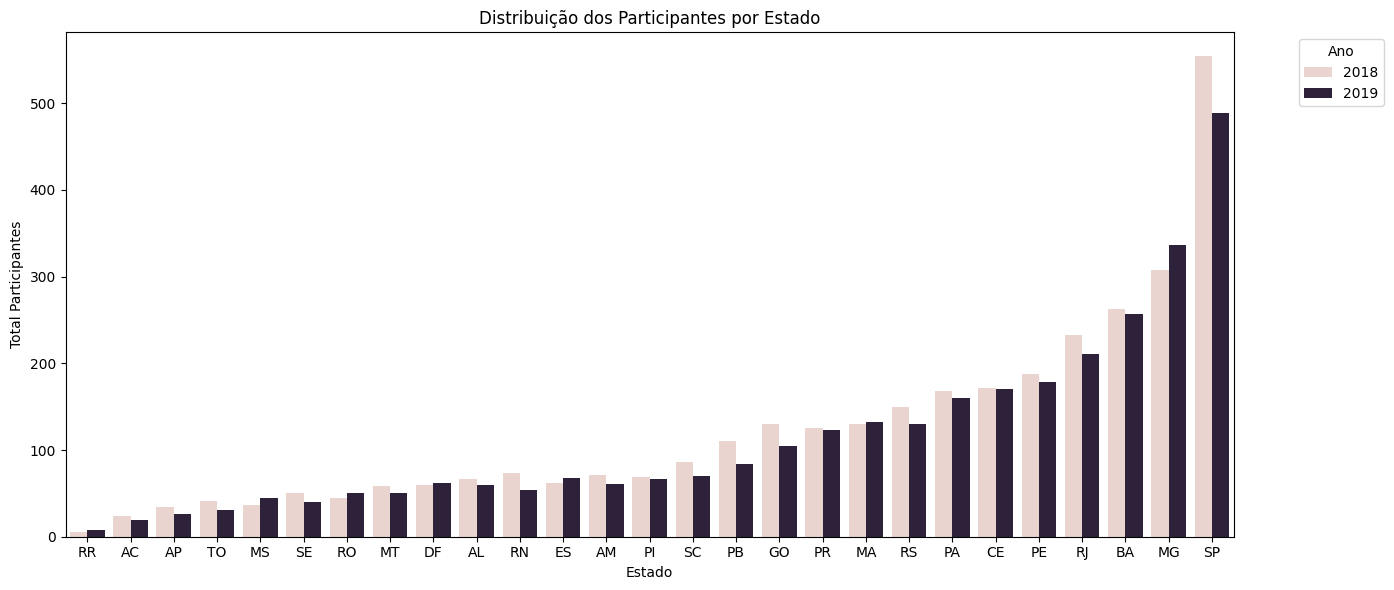

In [14]:
# Agrupa por ano e estado
participantes_estado_ano = df.groupby(['NU_ANO', 'SG_UF_RESIDENCIA'])['NU_INSCRICAO'].count().reset_index()

# Define a ordem dos estados (média de participantes em todos os anos)
ordem_estados = (
    participantes_estado_ano
    .groupby('SG_UF_RESIDENCIA')['NU_INSCRICAO']
    .mean()
    .sort_values()
    .index
)

# Cria gráfico ordenado
plt.figure(figsize=(14, 6))
sns.barplot(
    data=participantes_estado_ano,
    x='SG_UF_RESIDENCIA',
    y='NU_INSCRICAO',
    hue='NU_ANO',
    order=ordem_estados
)
plt.title("Distribuição dos Participantes por Estado")
plt.ylabel("Total Participantes")
plt.xlabel("Estado")
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2. Métricas nacionais de matemática (2018, presença = 1)

In [20]:
# Filtra apenas 2018 e presença na prova de matemática
df_2018_mt = df[(df['NU_ANO'] == 2018) & (df['TP_PRESENCA_MT'] == 1)]

# Métricas nacionais
metricas_nacionais = df_2018_mt['NU_NOTA_MT'].describe(percentiles=[0.25, 0.5, 0.75])
media = df_2018_mt['NU_NOTA_MT'].mean()
mediana = df_2018_mt['NU_NOTA_MT'].median()
q1 = df_2018_mt['NU_NOTA_MT'].quantile(0.25)
q3 = df_2018_mt['NU_NOTA_MT'].quantile(0.75)

print("Média:", media)
print("Mediana:", mediana)
print("1º Quartil:", q1)
print("3º Quartil:", q3)  # Questão teste

Média: 534.3408252853379
Mediana: 515.25
1º Quartil: 454.025
3º Quartil: 600.05


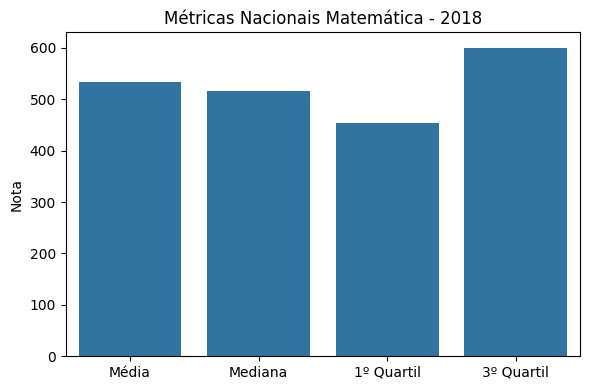

In [10]:
# 2. Métricas nacionais de matemática em 2018 (presentes)
df_2018_mt = df[(df['NU_ANO'] == 2018) & (df['TP_PRESENCA_MT'] == 1)]
metricas_nacionais = {
    'Média': df_2018_mt['NU_NOTA_MT'].mean(),
    'Mediana': df_2018_mt['NU_NOTA_MT'].median(),
    '1º Quartil': df_2018_mt['NU_NOTA_MT'].quantile(0.25),
    '3º Quartil': df_2018_mt['NU_NOTA_MT'].quantile(0.75)
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metricas_nacionais.keys()), y=list(metricas_nacionais.values()))
plt.title("Métricas Nacionais Matemática - 2018")
plt.ylabel("Nota")
plt.tight_layout()
plt.show()

3. Métricas por estado (comparando com nacional)

In [21]:
# Métricas nacionais já calculadas
q3_nacional = q3

# Métricas por estado
metricas_estado = df_2018_mt.groupby('SG_UF_RESIDENCIA')['NU_NOTA_MT'].agg(
    media='mean',
    mediana='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Comparação com nacional
metricas_estado['Q3_maior_que_nacional'] = metricas_estado['q3'] > q3_nacional

# Questão teste: terceiro quartil de Roraima
q3_rr = metricas_estado.loc[metricas_estado['SG_UF_RESIDENCIA'] == 'RR', 'q3'].values[0]
print(f"3º quartil de Roraima: {q3_rr}")
print("Comparação RR x BR:", "Acima" if q3_rr > q3_nacional else "Abaixo")

3º quartil de Roraima: 448.65
Comparação RR x BR: Abaixo


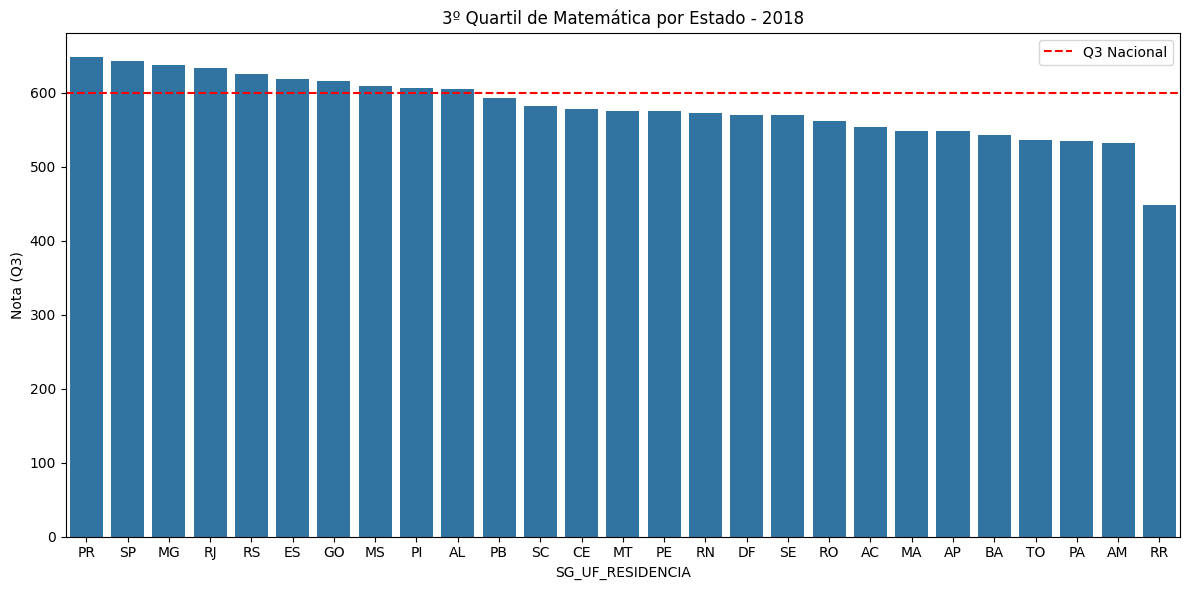

In [11]:
# 3. Métricas por estado (2018)
q3_nacional = metricas_nacionais['3º Quartil']
metricas_estado = df_2018_mt.groupby('SG_UF_RESIDENCIA')['NU_NOTA_MT'].agg(
    média='mean',
    mediana='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()
metricas_estado['Comparação_Q3'] = metricas_estado['q3'] - q3_nacional

plt.figure(figsize=(12, 6))
sns.barplot(data=metricas_estado.sort_values('q3', ascending=False), x='SG_UF_RESIDENCIA', y='q3')
plt.axhline(q3_nacional, color='red', linestyle='--', label='Q3 Nacional')
plt.title("3º Quartil de Matemática por Estado - 2018")
plt.ylabel("Nota (Q3)")
plt.legend()
plt.tight_layout()
plt.show()

4. Métricas por escolaridade do pai (Q001)

In [22]:
# Métricas por Q001
metricas_q001 = df_2018_mt.groupby('Q001')['NU_NOTA_MT'].agg(
    media='mean',
    mediana='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Questão teste
# Ensino médio completo → geralmente 'E'
mediana_em = metricas_q001.loc[metricas_q001['Q001'] == 'E', 'mediana'].values[0]
# Faculdade completa → geralmente 'H'
mediana_faculdade = metricas_q001.loc[metricas_q001['Q001'] == 'H', 'mediana'].values[0]

print("Mediana - Pais Ensino Médio:", mediana_em)
print("Mediana - Pais Faculdade:", mediana_faculdade)

Mediana - Pais Ensino Médio: 537.1
Mediana - Pais Faculdade: 496.65


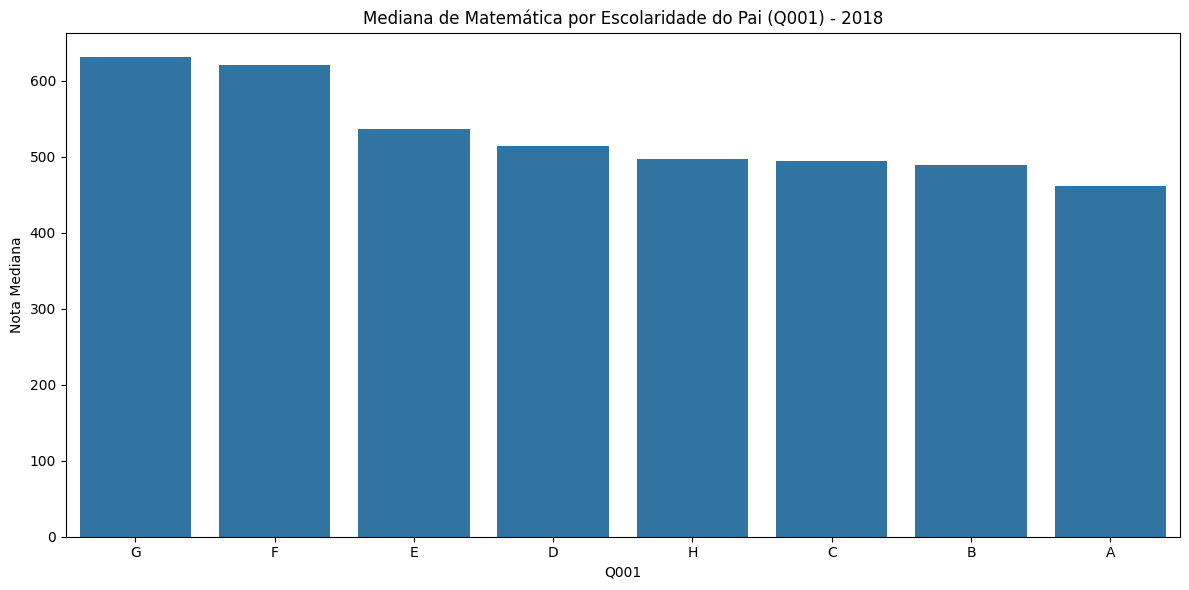

In [12]:
# 4. Métricas por escolaridade do pai (Q001) - 2018
metricas_q001 = df_2018_mt.groupby('Q001')['NU_NOTA_MT'].agg(
    média='mean',
    mediana='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=metricas_q001.sort_values('mediana', ascending=False), x='Q001', y='mediana')
plt.title("Mediana de Matemática por Escolaridade do Pai (Q001) - 2018")
plt.ylabel("Nota Mediana")
plt.tight_layout()
plt.show()